# Project: Communicate Data Findings
### By: Krutarth Darji

In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting style for the plots
sb.set_style('whitegrid')
sb.set_context("talk")

In [3]:
#Reading Dataset
fgb=pd.read_csv('fordgobike-tripdata.csv')

## Getting insight of the Dataset

In [4]:
fgb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
fgb.shape

(519700, 15)

In [6]:
fgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [7]:
fgb[['duration_sec','member_birth_year']].describe()

,duration_sec,member_birth_year
count,519700.000000,453159.000000
mean,1099.009521,1980.404787
std,3444.146451,10.513488
min,61.000000,1886.000000
25%,382.000000,1974.000000
50%,596.000000,1983.000000
75%,938.000000,1988.000000
max,86369.000000,1999.000000


## What is Structure of the data
> Data has 519700 rows and 15 columns, from June'17 to December'17

## What is/are the main feature(s) of interest in your dataset?
> I'm most interested in figuring out distribution of various variables like age,duration,start/end time etc and relationship among the variables through creating visualizations

In [8]:
#Setting appropriate datatype
fgb['start_time']=pd.to_datetime(fgb['start_time'])
fgb['end_time']=pd.to_datetime(fgb['end_time'])

In [9]:
#Adding column named which shows age
fgb['member_age']=2018-fgb['member_birth_year']

# Univariate Exploration

### Question 1. Distribution of Age of the members

In [10]:
fgb['member_age'].max()

132.0

In [11]:
list1=fgb['member_age'].unique()

In [12]:
list2=list1>95

In [13]:
import collections
collections.Counter(list2)

Counter({False: 68, True: 6})

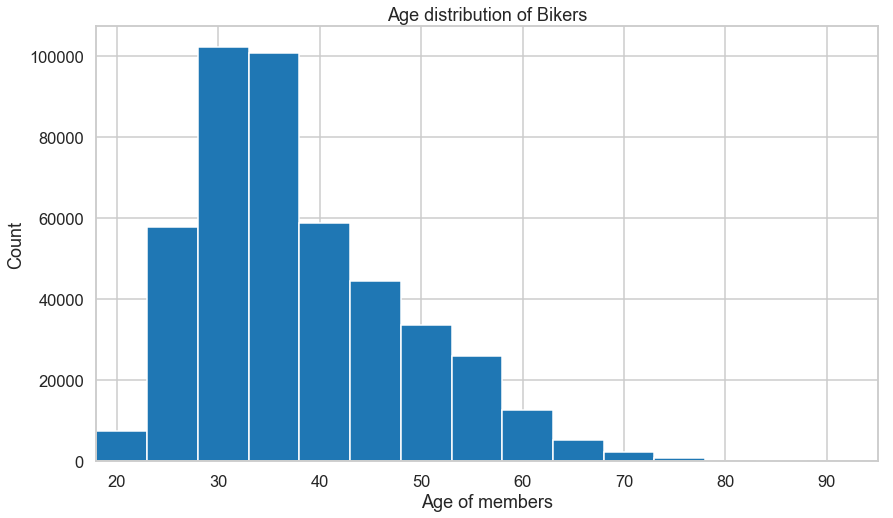

In [14]:
plt.figure(figsize=[14,8])
plt.hist(data=fgb,x='member_age',bins=np.arange(18,95+5,5));
plt.xlabel('Age of members')
plt.ylabel('Count')
plt.title('Age distribution of Bikers')
plt.xlim(18,95);

### Answer
> Maximum number of members are below the age of 80 and most the members are having ages 30-40

In [15]:
fgb['member_gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [16]:
#Considering only Non null genders
fgb_sub=fgb.loc[fgb['member_gender'].isin(['Male','Female','Other'])]

### Question 2. Gender Distribution of  the dataset

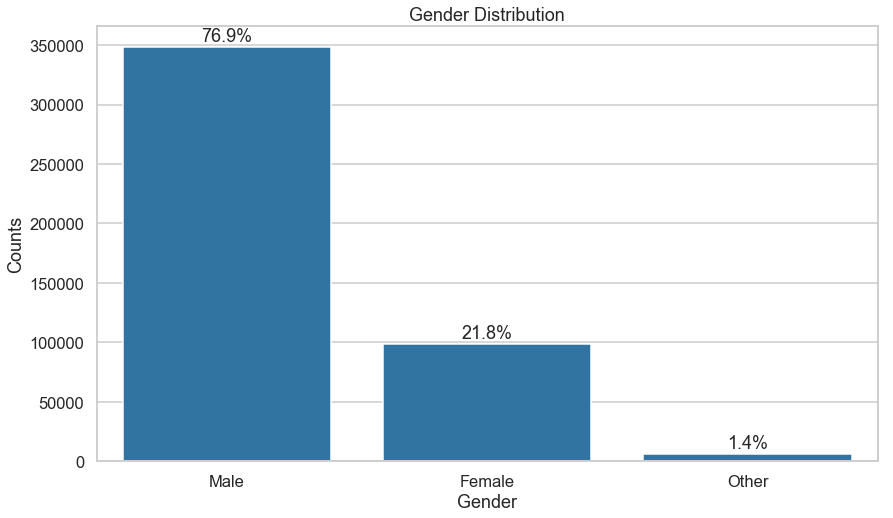

In [17]:
plt.figure(figsize=[14,8])
order1=fgb_sub['member_gender'].value_counts().index
sb.countplot(data=fgb_sub,x='member_gender',order=order1,color=sb.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender Distribution')
order2=fgb_sub['member_gender'].value_counts()
for i in range (order2.shape[0]):
    count=order2[i]
    strt='{:0.1f}%'.format(100*count / fgb_sub.shape[0])
    plt.text(i,count+5000,strt,ha='center')

### Answer:
> Above figure shows the gender distribution clearly by showing the proportions as well as counts

In [18]:
order2=fgb_sub['member_gender'].value_counts()

In [19]:
order2[0]

348318

### Question 3. Find most commonly used start stations

In [20]:
arr1=fgb['start_station_id'].value_counts()[:20]

In [21]:
print(arr1.mean());
print(arr1.std());

9032.95
3066.831443465972


In [22]:
arr1

15     15187
6      13664
30     12546
67     12055
58     11960
21     11334
81     10956
3      10142
22      9926
16      9347
5       7987
17      7649
50      6605
66      6414
90      6223
23      5980
48      5785
25      5732
324     5609
182     5558
Name: start_station_id, dtype: int64

In [23]:
fgb_sub1=fgb.loc[fgb['start_station_id'].isin(arr1.index)]

In [24]:
fgb_sub1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,NaN
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,28.0
13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990.0,Male,28.0
14,2697,2017-12-31 23:35:23.222,2018-01-01 00:20:20.813,66,3rd St at Townsend St,37.778742,-122.392741,23,The Embarcadero at Steuart St,37.791464,-122.391034,3452,Customer,NaN,NaN,NaN
21,4174,2017-12-31 22:52:22.286,2018-01-01 00:01:56.614,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6,The Embarcadero at Sansome St,37.804770,-122.403234,809,Customer,NaN,NaN,NaN


Text(0.5, 1.0, 'Station ID of most common starting starting station')

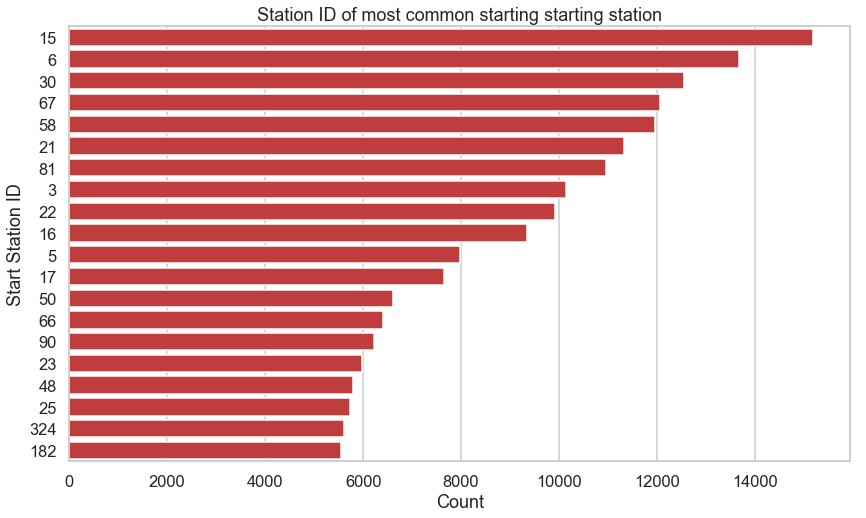

In [25]:
plt.figure(figsize=[14,8])
sb.countplot(data=fgb_sub1,y='start_station_id',order=arr1.index,color=sb.color_palette()[3]);
plt.ylabel('Start Station ID')
plt.xlabel('Count')
plt.title('Station ID of most common starting starting station')

### Answer:
> Above figure shows the most common start station on the vertical axis and their number of occurence on the horizontal axis

### Question 4. Find most commonly used end stations

In [26]:
arr2=fgb['end_station_id'].value_counts()[:20]

In [27]:
print(arr2.mean());
print(arr2.std());

9611.0
4074.9983015818225


In [28]:
arr2

30    17378
15    17109
6     16531
67    13658
21    13443
58    11298
3     11064
81    10611
16     9321
5      8563
22     7791
50     7277
90     6681
17     6320
44     6275
66     6132
23     5814
25     5722
19     5651
48     5581
Name: end_station_id, dtype: int64

In [29]:
fgb_sub2=fgb.loc[fgb['end_station_id'].isin(arr2.index)]

In [30]:
fgb_sub2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,NaN
10,3292,2017-12-31 23:46:32.403,2018-01-01 00:41:24.605,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,22,Howard St at Beale St,37.789756,-122.394643,3058,Customer,NaN,NaN,NaN
11,3177,2017-12-31 23:48:11.757,2018-01-01 00:41:09.581,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,22,Howard St at Beale St,37.789756,-122.394643,3197,Customer,NaN,NaN,NaN
14,2697,2017-12-31 23:35:23.222,2018-01-01 00:20:20.813,66,3rd St at Townsend St,37.778742,-122.392741,23,The Embarcadero at Steuart St,37.791464,-122.391034,3452,Customer,NaN,NaN,NaN


Text(0.5, 1.0, 'Station ID of most common starting starting station')

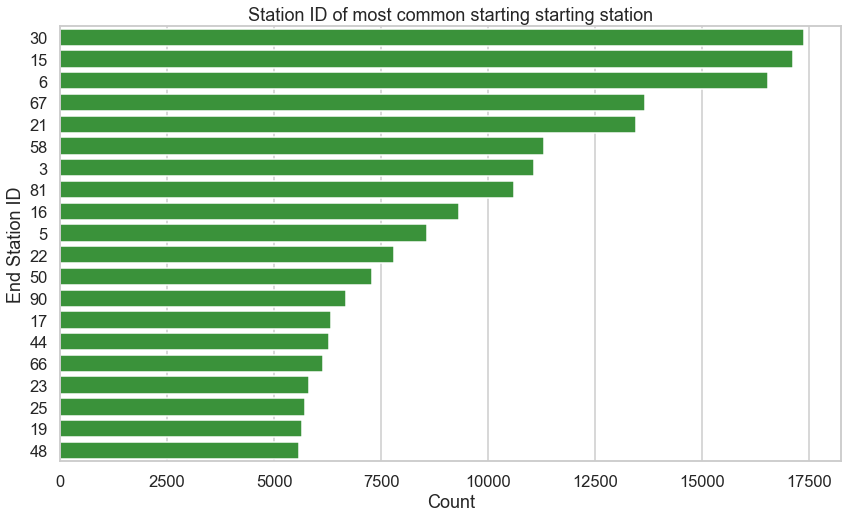

In [31]:
plt.figure(figsize=[14,8])
sb.countplot(data=fgb_sub2,y='end_station_id',order=arr2.index,color=sb.color_palette()[2]);
plt.ylabel('End Station ID')
plt.xlabel('Count')
plt.title('Station ID of most common starting starting station')

### Answer:
> Above figure shows the most common end station on the vertical axis and their number of occurence on the horizontal axis

### Question 5. Month wise distribution of the Rented bikes

In [32]:
fgb['start_time'].min()

Timestamp('2017-06-28 09:47:36.347000')

In [33]:
fgb['end_time'].min()

Timestamp('2017-06-28 09:52:55.338000')

In [34]:
fgb['start_time'].max()

Timestamp('2017-12-31 23:59:01.261000')

In [35]:
fgb['end_time'].max()

Timestamp('2018-01-01 15:12:50.245000')

Forming relevant new columns of start and end month year of start and end times

In [36]:
fgb['start_month_year']=fgb['start_time'].map(lambda x: x.strftime('%m-%Y'))

In [37]:
fgb['end_month_year']=fgb['end_time'].map(lambda x: x.strftime('%m-%Y'))

In [38]:
fgb_sub3=fgb.groupby('start_month_year').count()

In [39]:
fgb_sub3.iloc[0]['bike_id']

2689

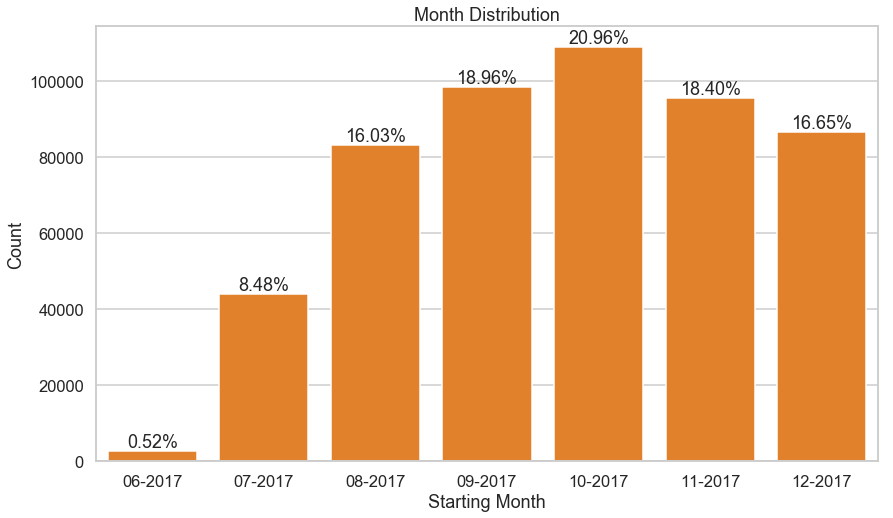

In [40]:
plt.figure(figsize=[14,8])
sb.barplot(data=fgb_sub3,x=fgb_sub3.index,y='bike_id',color=sb.color_palette()[1]);
plt.xlabel('Starting Month')
plt.ylabel('Count')
plt.title('Month Distribution')
for i in range(fgb_sub3.shape[0]):
    count=fgb_sub3.iloc[i]['bike_id']
    strt='{:0.2f}%'.format(100*count/fgb.shape[0])
    plt.text(i,count+1000,strt,ha='center')

### Answer:
> Above figure clearly describes the month wise distribution of the rented bikes, showing proportion as well as total count

### Question 6.  Start time Distribution of the rented bikes

In [41]:
fgb['start_hour']=fgb['start_time'].dt.hour
fgb['end_hour']=fgb['end_time'].dt.hour

In [42]:
fgb_sub4=fgb.groupby('start_hour').count()

Text(0.5, 1.0, 'Hour Distribution')

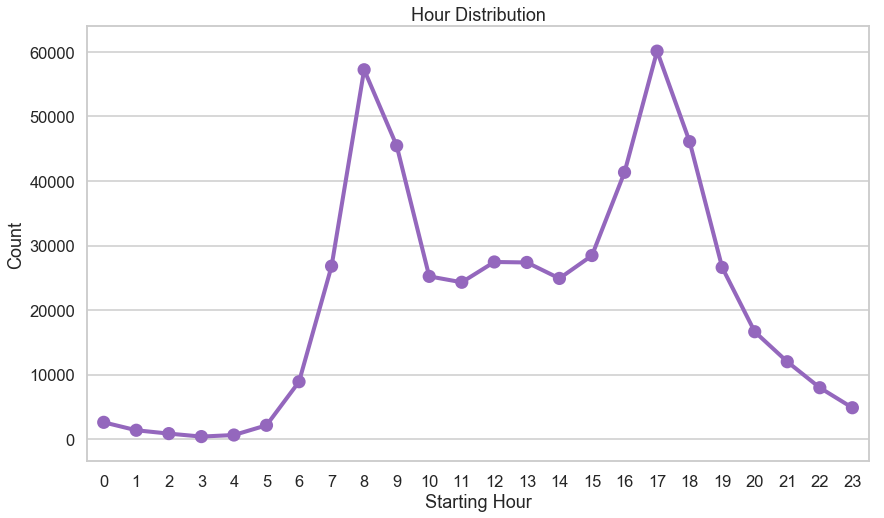

In [43]:
plt.figure(figsize=[14,8])
sb.pointplot(data=fgb_sub4,x=fgb_sub4.index,y='bike_id',color=sb.color_palette()[4]);
plt.xlabel('Starting Hour')
plt.ylabel('Count')
plt.title('Hour Distribution')

### Answer:
> Above plt shows that start hour 8 and 17 are most used and least used start hours are 2,3 and 4

### Question 7.  End time Distribution of the rented bikes

In [44]:
fgb_sub5=fgb.groupby('end_hour').count()

Text(0.5, 1.0, 'Ending Hour Distribution')

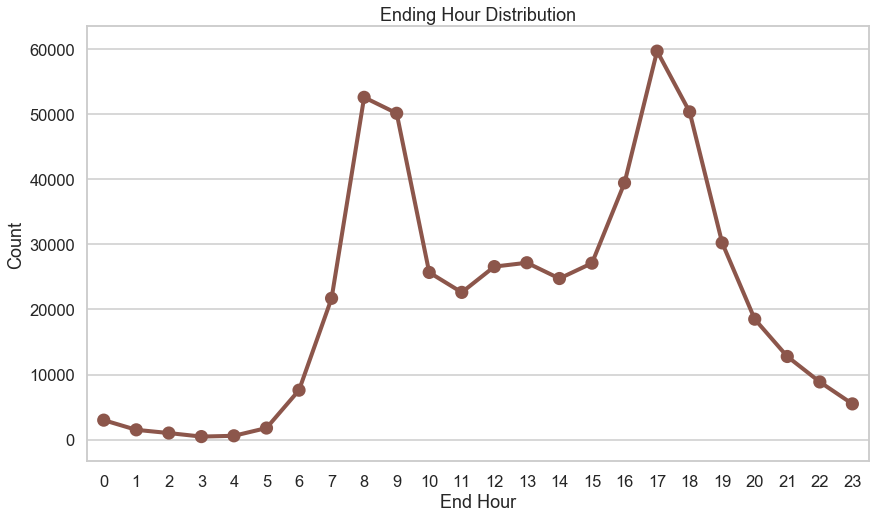

In [45]:
plt.figure(figsize=[14,8])
sb.pointplot(data=fgb_sub5,x=fgb_sub5.index,y='bike_id',color=sb.color_palette()[5]);
plt.xlabel('End Hour')
plt.ylabel('Count')
plt.title('Ending Hour Distribution')

### Answer:
> Above plt shows that end hour 8,9 and 17 are most used and least used start hours are 2,3 and 4

### Question 8. Starting days distribution for the rented bikes

Forming relevant columns for the start and end days from start and end time

In [46]:
fgb['start_time_weekday']=fgb['start_time'].dt.weekday_name
fgb['end_time_weekday']=fgb['end_time'].dt.weekday_name

In [47]:
fgb_sub6=fgb.groupby('start_time_weekday').count()

In [48]:
fgb_sub6.reset_index(inplace=True)

In [49]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daysOrder=pd.api.types.CategoricalDtype(ordered=True, categories=days)
fgb_sub6['start_time_weekday']=fgb_sub6['start_time_weekday'].astype(daysOrder)

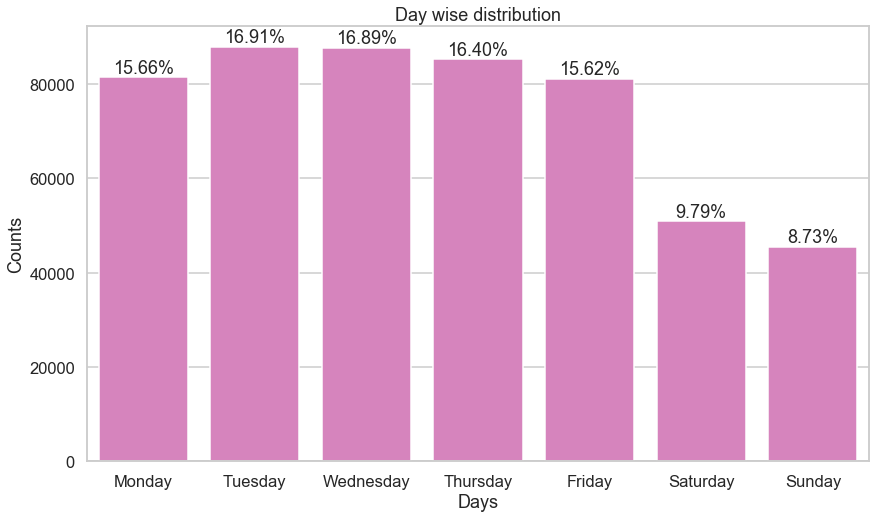

In [50]:
plt.figure(figsize=[14,8])
sb.barplot(data=fgb_sub6,x='start_time_weekday',y='duration_sec',color=sb.color_palette()[6]);
plt.title('Day wise distribution');
plt.xlabel('Days')
plt.ylabel('Counts')
for i in range(fgb_sub6.shape[0]):
    arr3=[1,5,6,4,0,2,3]
    j=arr3[i]
    count=fgb_sub6.iloc[j]['bike_id']
    strt='{:0.2f}%'.format(100*count/fgb.shape[0])
    plt.text(i,count+1000,strt,ha='center')

###  Answer:
> Above plot shows the distribution of rented bikes with respect to the weekday, on saturday and sunday less number of bikes are rented.

### Question 9. Distribution of the duration of journey from the member

In [51]:
# 99.7% journeys have time duration less than 3500 seconds
(fgb['duration_sec']>3500).mean()

0.03185876467192611

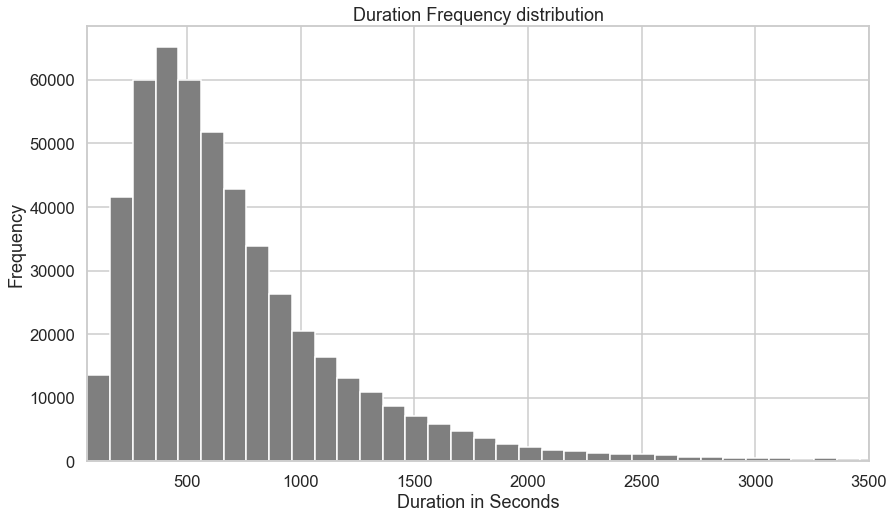

In [52]:
plt.figure(figsize=[14,8])
plt.hist(data=fgb,x='duration_sec',bins=np.arange(60,3500+100,100),color=sb.color_palette()[7])
plt.xlim(60,3500)
plt.xlabel('Duration in Seconds');
plt.ylabel('Frequency');
plt.title('Duration Frequency distribution');

### Answer:
> Above plot shows that most of the journeys are less than 2000 seconds, most common journey are 260-460 seconds

### Question 10. Distribution according to the user type

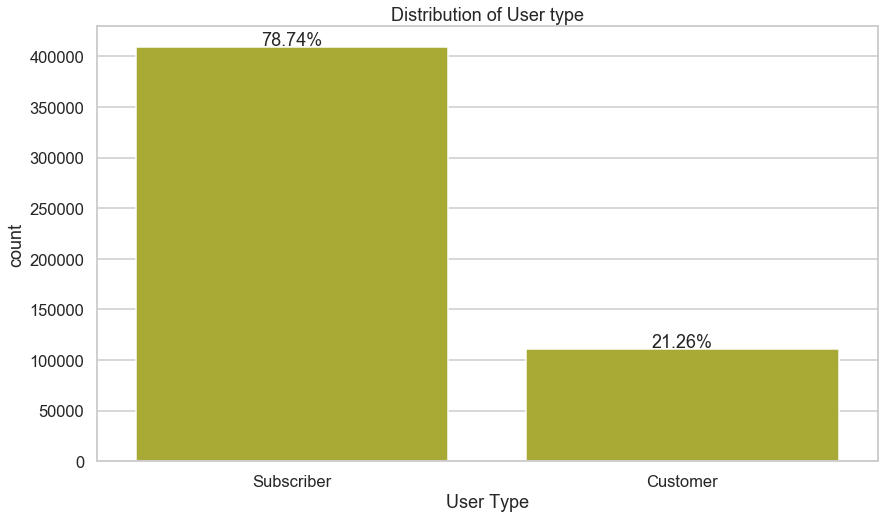

In [53]:
plt.figure(figsize=[14,8])
sb.countplot(data=fgb,x='user_type',order=['Subscriber','Customer'],color=sb.color_palette()[8])
for i in range(fgb['user_type'].value_counts().shape[0]):
    count=fgb['user_type'].value_counts()[i]
    strt='{:0.2f}%'.format(100*count/fgb.shape[0])
    plt.text(i,count+2000,strt,ha='center')
plt.xlabel('User Type');
plt.title('Distribution of User type');

### Answer:
> plot shows distribution according to the user type, Subscriber user type is around 80% and customer user type is around 20%.

### Question 11. Age Group distribution in the dataset.

In [54]:
#Creating age group through creating bins
fgb['member_age_bins']=fgb['member_age'].apply(lambda x: '18 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60+' if 60<x<=132
                                                  else x)

In [55]:
fgb_sub7=fgb.groupby('member_age_bins').count()
fgb_sub7

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,member_age,start_month_year,end_month_year,start_hour,end_hour,start_time_weekday,end_time_weekday
member_age_bins,,,,,,,,,,,,,,,,,,,,,
18 - 20,2443,2443,2443,2443,2443,2443,2443,2443,2443,2443,...,2443,2443,2443,2443,2443,2443,2443,2443,2443,2443
20 - 30,122457,122457,122457,122457,122457,122457,122457,122457,122457,122457,...,122457,122457,122457,122457,122457,122457,122457,122457,122457,122457
30 - 40,181790,181790,181790,181790,181790,181790,181790,181790,181790,181790,...,181790,181790,181790,181790,181790,181790,181790,181790,181790,181790
40 - 50,88180,88180,88180,88180,88180,88180,88180,88180,88180,88180,...,88180,88180,88180,88180,88180,88180,88180,88180,88180,88180
50 - 60,44872,44872,44872,44872,44872,44872,44872,44872,44872,44872,...,44872,44872,44872,44872,44872,44872,44872,44872,44872,44872
60+,13417,13417,13417,13417,13417,13417,13417,13417,13417,13417,...,13417,13417,13417,13417,13417,13417,13417,13417,13417,13417


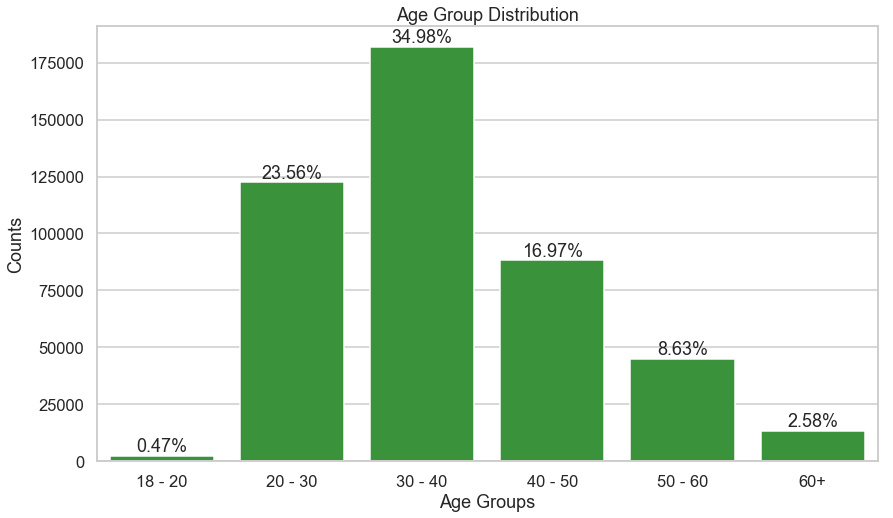

In [56]:
plt.figure(figsize=[14,8])
sb.barplot(data=fgb_sub7,x=fgb_sub7.index,y='bike_id',color=sb.color_palette()[2]);
plt.xlabel('Age Groups');
plt.ylabel('Counts');
plt.title('Age Group Distribution');
for i in range (fgb_sub7.shape[0]):
    count=fgb_sub7.iloc[i]['bike_id']
    strt='{:0.2f}%'.format(100*count/fgb.shape[0])
    plt.text(i,count+2000,strt,ha='center')

### Answer:
> Plot shows that most number of users are from the age group 20-40

## Bivariate Plots

### Question 12. Relationship between Gender and Duration of the journey.

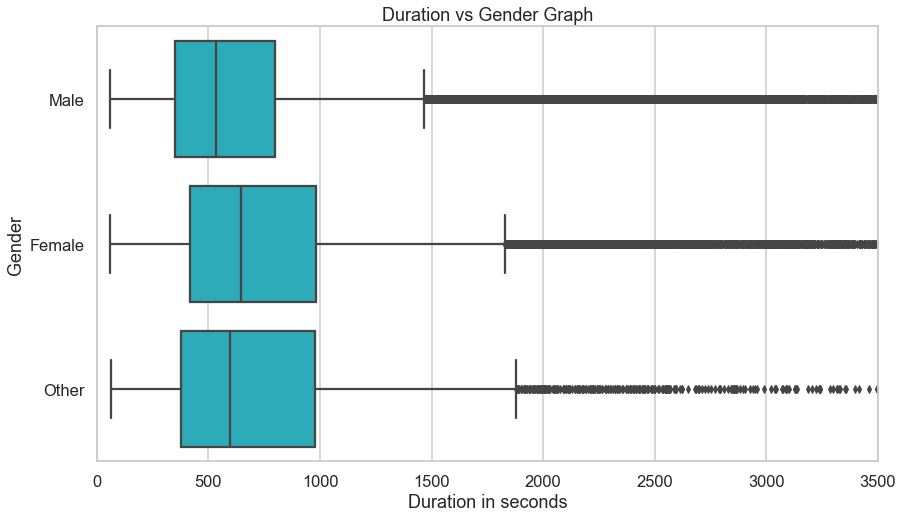

In [57]:
plt.figure(figsize=[14,8])
sb.boxplot(data=fgb,y='member_gender',x='duration_sec',color=sb.color_palette()[9]);
plt.xlim(0,3500)
plt.xlabel('Duration in seconds');
plt.ylabel('Gender')
plt.title('Duration vs Gender Graph');

### Answer:
> Above plot shows us that we have huge number of outliers in all three genders and mean duration of female gender is highest.

### Question 13. Relationship between user type and duration

In [58]:
userOrder=['Subscriber','Customer']
userClass=pd.api.types.CategoricalDtype(ordered=True,categories=userOrder)
fgb['user_type']=fgb['user_type'].astype(userClass)

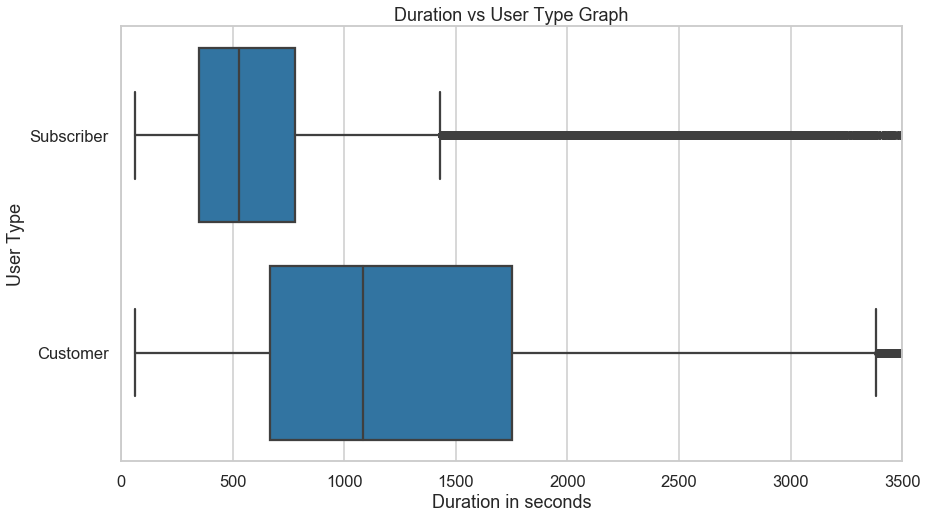

In [59]:
plt.figure(figsize=[14,8])
sb.boxplot(data=fgb,y='user_type',x='duration_sec',color=sb.color_palette()[0]);
plt.xlim(0,3500)
plt.xlabel('Duration in seconds');
plt.ylabel('User Type');
plt.title('Duration vs User Type Graph');

### Answer:
> Huge number of outliers are observed in both categories however customer user type member usually takes more longer journey with respect to duration.

### Question 14. Trends of starting hour of the user types.

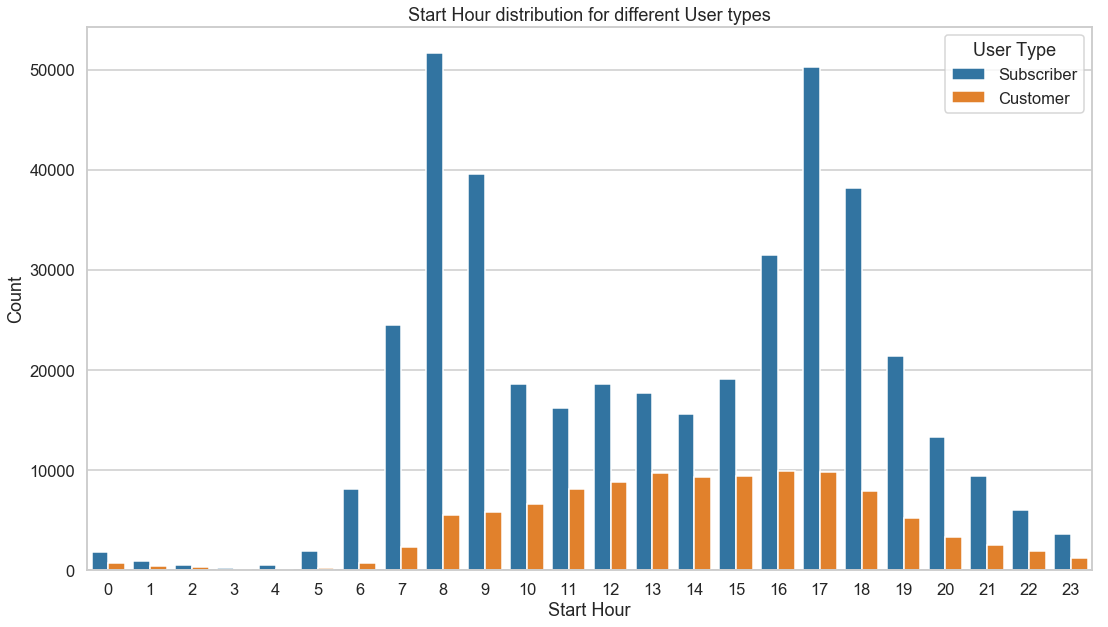

In [60]:
plt.figure(figsize=[18,10])
sb.countplot(data=fgb,x='start_hour',hue='user_type');
plt.legend(title='User Type');
plt.xlabel('Start Hour');
plt.ylabel('Count');
plt.title('Start Hour distribution for different User types');

### Answer:
> Above plot shows that most used start hour for Subscribers is 8 and 5 while for the customers start hour frequency increases from 6-17 and then starts decrerasing

### Question 15. Trends of start hour with respect to gender.

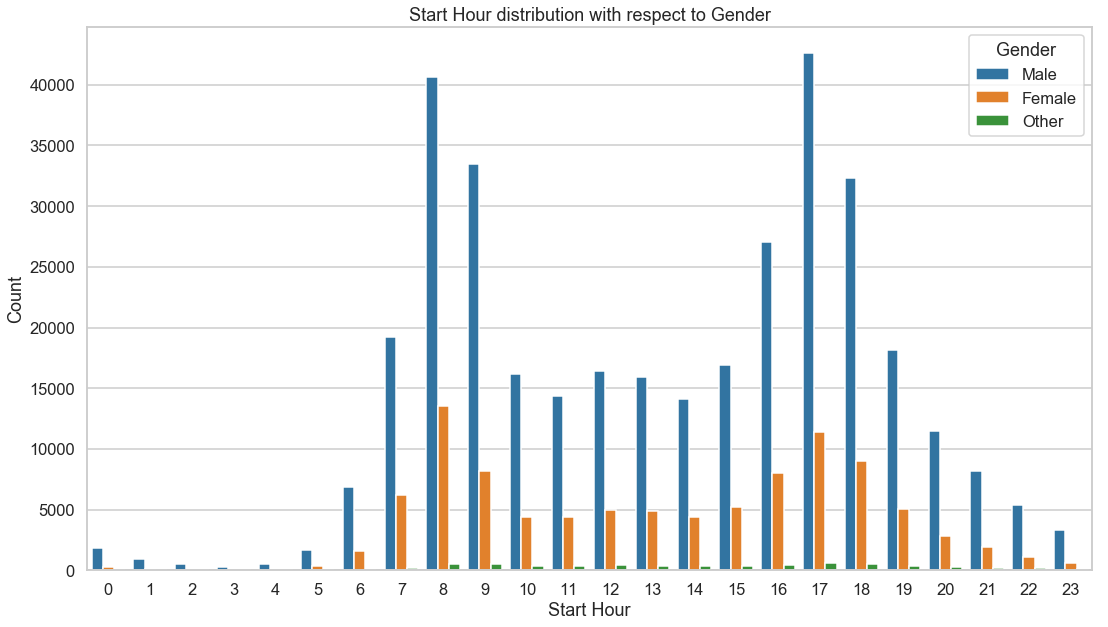

In [61]:
plt.figure(figsize=[18,10])
sb.countplot(data=fgb,x='start_hour',hue='member_gender');
plt.legend(title='Gender');
plt.xlabel('Start Hour');
plt.ylabel('Count');
plt.title('Start Hour distribution with respect to Gender');

### Question 16. Trends between Start hour and Duration of the journey.

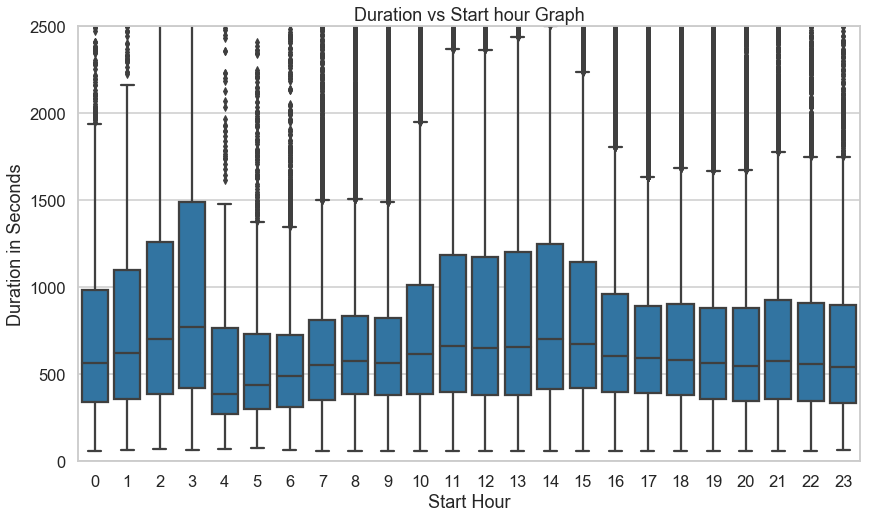

In [62]:
plt.figure(figsize=[14,8])
sb.boxplot(data=fgb,x='start_hour',y='duration_sec',color=sb.color_palette()[0]);
plt.ylim(0,2500)
plt.xlabel('Start Hour');
plt.ylabel('Duration in Seconds');
plt.title('Duration vs Start hour Graph');

### Question 17. Trends between Start month and age group.

In [63]:
fgb_sub8=fgb.groupby(['member_age_bins','start_month_year']).count()
fgb_sub8.reset_index(inplace=True)

In [64]:
fgb_sub8

,member_age_bins,start_month_year,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,bike_id,user_type,member_birth_year,member_gender,member_age,end_month_year,start_hour,end_hour,start_time_weekday,end_time_weekday
0,18 - 20,06-2017,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,18 - 20,07-2017,193,193,193,193,193,193,193,193,...,193,193,193,193,193,193,193,193,193,193
2,18 - 20,08-2017,602,602,602,602,602,602,602,602,...,602,602,602,602,602,602,602,602,602,602
3,18 - 20,09-2017,479,479,479,479,479,479,479,479,...,479,479,479,479,479,479,479,479,479,479
4,18 - 20,10-2017,393,393,393,393,393,393,393,393,...,393,393,393,393,393,393,393,393,393,393
5,18 - 20,11-2017,478,478,478,478,478,478,478,478,...,478,478,478,478,478,478,478,478,478,478
6,18 - 20,12-2017,294,294,294,294,294,294,294,294,...,294,294,294,294,294,294,294,294,294,294
7,20 - 30,06-2017,419,419,419,419,419,419,419,419,...,419,419,419,419,419,419,419,419,419,419
8,20 - 30,07-2017,7687,7687,7687,7687,7687,7687,7687,7687,...,7687,7687,7687,7687,7687,7687,7687,7687,7687,7687
9,20 - 30,08-2017,16024,16024,16024,16024,16024,16024,16024,16024,...,16024,16024,16024,16024,16024,16024,16024,16024,16024,16024


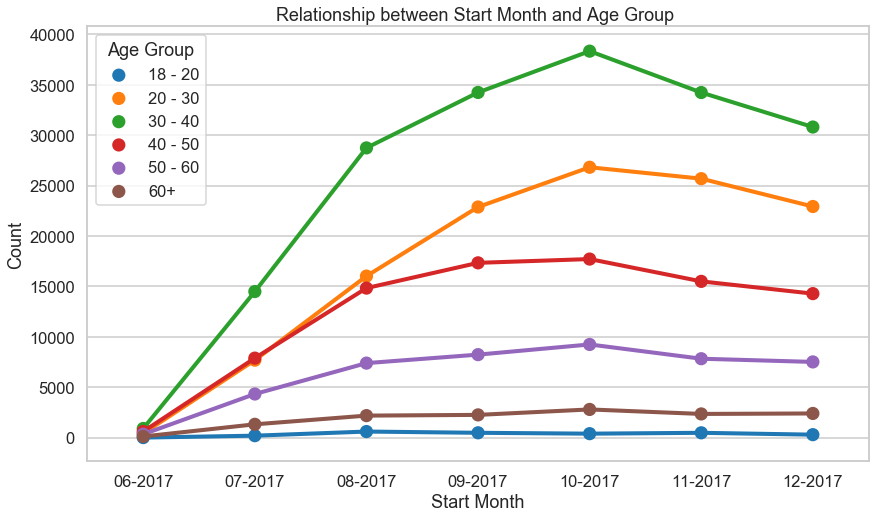

In [65]:
plt.figure(figsize=[14,8])
sb.pointplot(data=fgb_sub8,x='start_month_year',hue='member_age_bins',y='bike_id');
plt.legend(title='Age Group');
plt.title('Relationship between Start Month and Age Group ');
plt.xlabel('Start Month');
plt.ylabel('Count');

### Question 18. Trends between different user type and start month

In [66]:
fgb_sub9=fgb.groupby(['user_type','start_month_year']).count()
fgb_sub9.reset_index(inplace=True)

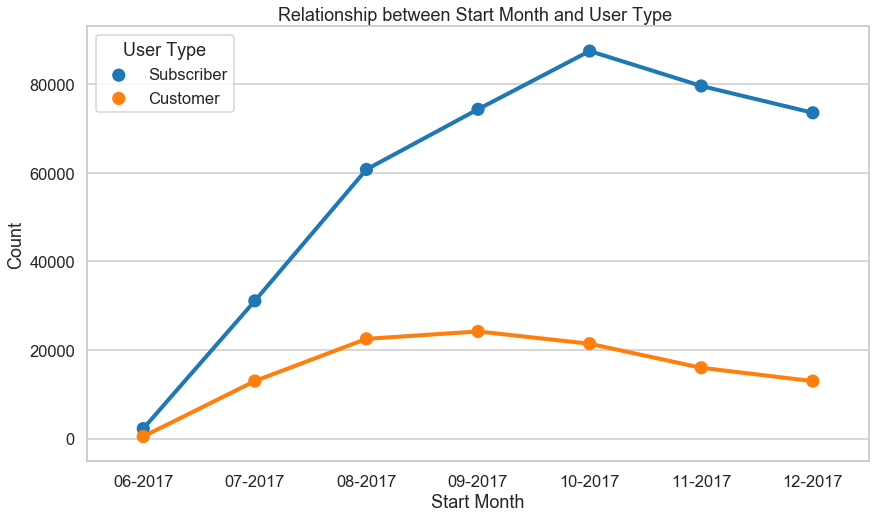

In [67]:
plt.figure(figsize=[14,8])
sb.pointplot(data=fgb_sub9,x='start_month_year',hue='user_type',y='bike_id');
plt.legend(title='User Type');
plt.title('Relationship between Start Month and User Type ');
plt.xlabel('Start Month');
plt.ylabel('Count');

## Multivariate Plots

### Question 19. Trends between start day and duration for the different gender

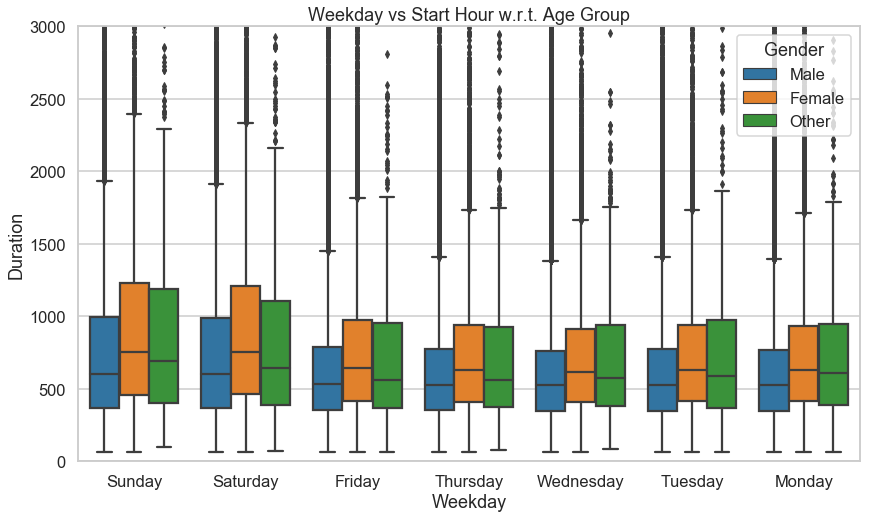

In [68]:
plt.figure(figsize=[14,8])
sb.boxplot(data=fgb,y='duration_sec',x='start_time_weekday',hue='member_gender');
plt.xlabel('Weekday');
plt.ylabel('Duration');
plt.ylim([0,3000])
plt.title('Weekday vs Start Hour w.r.t. Age Group');
plt.legend(title='Gender',loc=1)

### Question 20. Trends between start hour and duration for the different user type

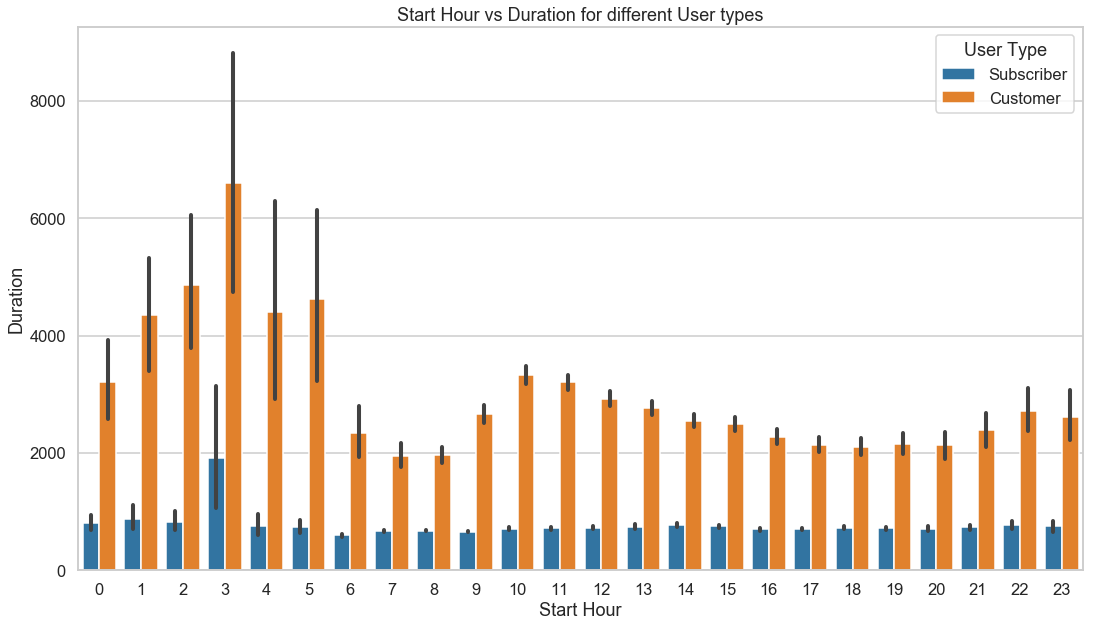

In [69]:
plt.figure(figsize=[18,10])
sb.barplot(data=fgb,x='start_hour',y='duration_sec',hue='user_type');
plt.legend(title='User Type');
plt.xlabel('Start Hour');
plt.ylabel('Duration');
plt.title('Start Hour vs Duration for different User types');

### Question 21. Trends between duration and start hour for the different age groups using heat maps

<Figure size 1440x1440 with 0 Axes>

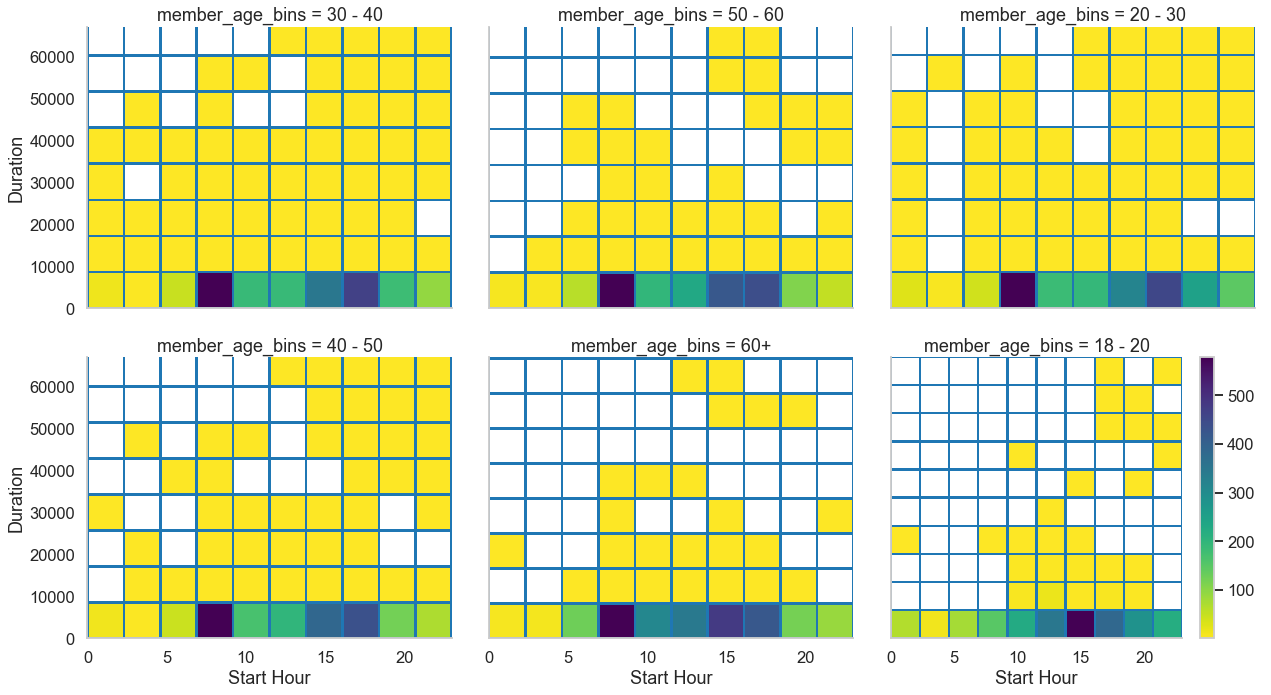

In [70]:
plt.figure(figsize=[20,20])
g=sb.FacetGrid(data=fgb,col='member_age_bins',col_wrap=3,height=5,aspect=1.2)
g.map(plt.hist2d,'start_hour','duration_sec',cmin=0.1,cmap='viridis_r');
g.set_axis_labels("Start Hour", "Duration")
plt.colorbar()

### Question 22. Trends between duration and start month for different genders

<Figure size 1440x1440 with 0 Axes>

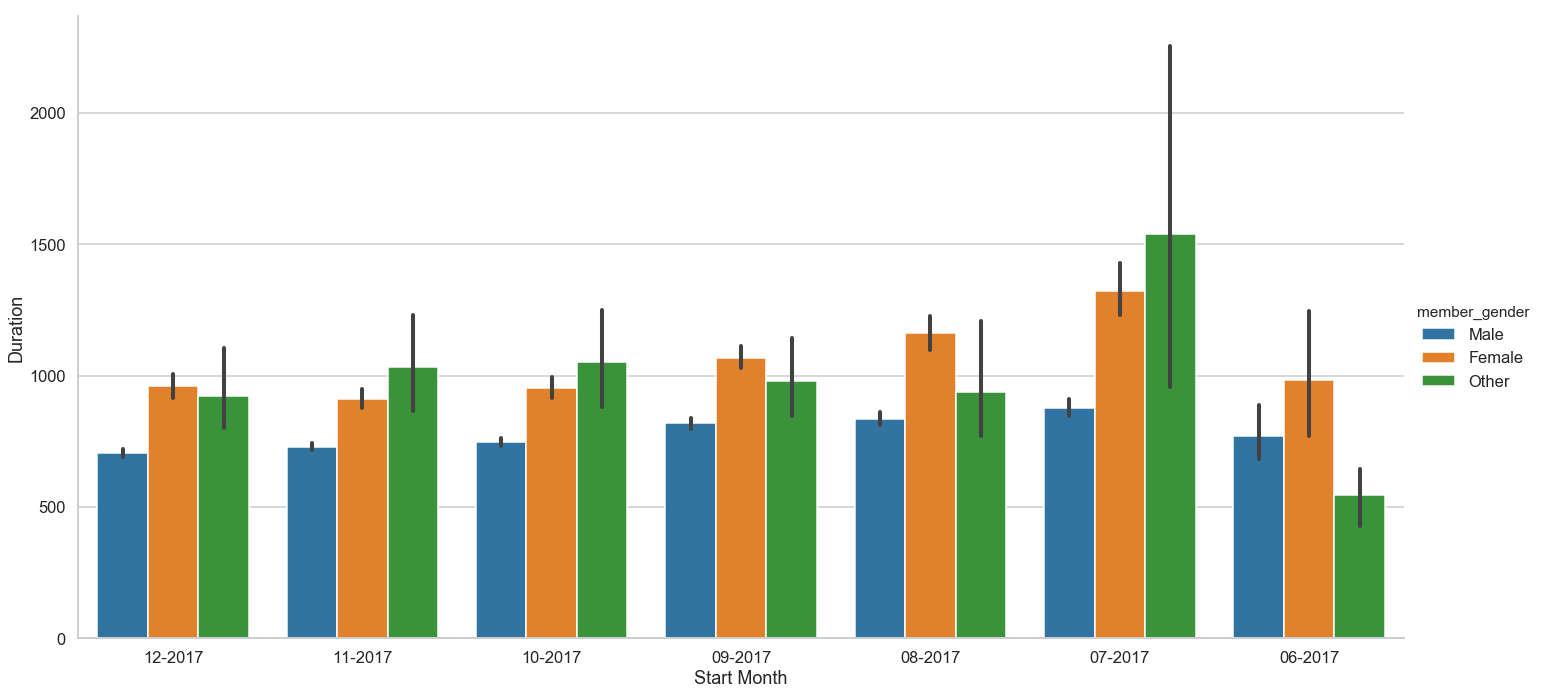

In [71]:
plt.figure(figsize=[20,20])
g=sb.catplot(x="start_month_year",y="duration_sec",hue="member_gender",data=fgb,kind="bar",height=10,aspect=2)
g.set_axis_labels("Start Month", "Duration")

### Question 23. Trends between duration and start day for different user type with repect to age group

In [72]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daysOrder=pd.api.types.CategoricalDtype(ordered=True, categories=days)
fgb['start_time_weekday']=fgb['start_time_weekday'].astype(daysOrder)

<Figure size 1080x576 with 0 Axes>

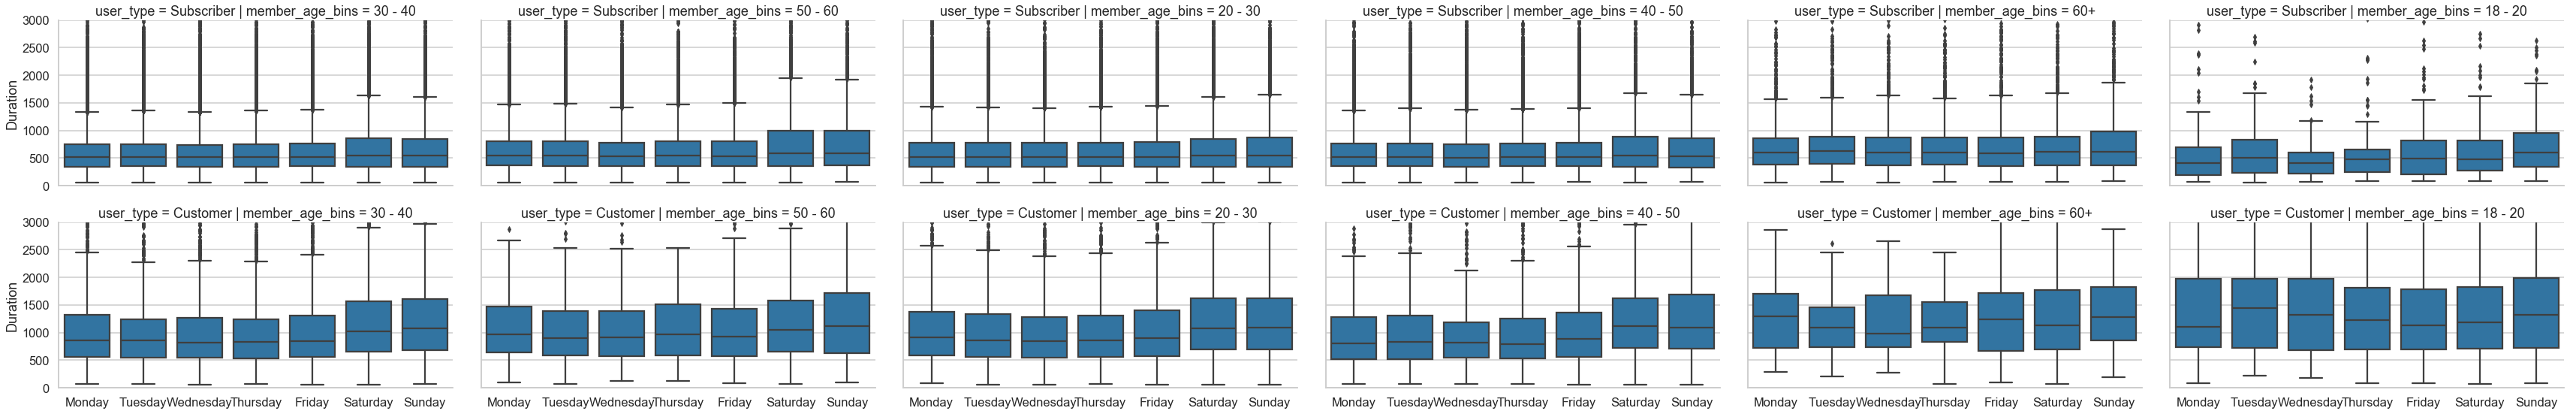

In [73]:
plt.figure(figsize=[15,8])
g=sb.FacetGrid(data=fgb,col='member_age_bins',row='user_type',height=4,aspect=2,margin_titles=False)
g.map(sb.boxplot,'start_time_weekday','duration_sec');
g.set_axis_labels("", "Duration")
g.set(ylim=(0,3000))
plt.tight_layout()

# Reflection:
> There are some outliers in the age columns, few members are having age greater than 110.

> October'17 is the month in which maximum business for the Ford GoBike is done, in this particular data.

> Subscriber user type has 80% proportions

> Male gender members are about of 75% proportion.

> 20-40 is the most common age group of the members.

> In the month of july member of other gender took mean duration of more than 1500 seconds.

> Mean duration for the start hour 3 is highest.

> Customer user type use to have mean duration longer than subscriber user type.

> 260-460seconds is the most common duration time